In [1]:
import pandas as pd
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType, DoubleType

In [2]:
spark = SparkSession.builder \
        .config("spark.executor.memory", "32g") \
        .config("spark.driver.memory", "32g") \
        .config("spark.sql.pivotMaxValues", "140000") \
        .config("spark.executor.cores", "8") \
        .appName("hw4") \
        .master("local[*]") \
        .getOrCreate()
spark

In [9]:
prediction = spark.read.option("header", "true").csv('../out/predictions_total-1606585916-5000000.csv/')
prediction = prediction.withColumn('userId', F.col('userId').cast(IntegerType()))
prediction = prediction.withColumn('movieId', F.col('movieId').cast(IntegerType()))
prediction = prediction.withColumn('rating', F.col('rating').cast(DoubleType()))
prediction = prediction.withColumn('prediction_item_item_cf', F.col('prediction_item_item_cf').cast(DoubleType()))
prediction = prediction.withColumn('prediction_als', F.col('prediction_als').cast(DoubleType()))
prediction = prediction.withColumn('prediction', F.col('prediction').cast(DoubleType()))
prediction.show()

+------+-------+------+-----------------------+--------------+------------------+
|userId|movieId|rating|prediction_item_item_cf|prediction_als|        prediction|
+------+-------+------+-----------------------+--------------+------------------+
|    18|   3507|   4.0|     3.7333333333333334|     3.6497035|3.6998814010620116|
|    25|     22|   4.0|     3.3666666666666667|     3.0944626| 3.257785053253174|
|    35|   3793|   4.0|      4.466666666666667|       4.03802| 4.295208053588867|
|    39|    648|   4.0|     3.7333333333333334|     3.4047287| 3.601891460418701|
|    50|   5618|   5.0|      4.566666666666666|     4.4561696| 4.522467842102051|
|    53|   1272|   3.0|      4.133333333333334|     4.2321353| 4.172854118347168|
|    62|   3911|   4.0|                    4.4|     4.5641127| 4.465645065307617|
|    64|    588|   4.0|      4.266666666666667|     4.4000607| 4.320024261474609|
|    68|    261|   4.0|      3.466666666666667|     3.6663845| 3.546553783416748|
|    82|   1203|

In [10]:
prediction.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- prediction_item_item_cf: double (nullable = true)
 |-- prediction_als: double (nullable = true)
 |-- prediction: double (nullable = true)



In [11]:
prediction_df = prediction.toPandas()

In [12]:
prediction_df.shape

(999950, 6)

In [13]:
prediction_df

,userId,movieId,rating,prediction_item_item_cf,prediction_als,prediction
0,18,3507,4.0,3.733333,3.649704,3.699881
1,25,22,4.0,3.366667,3.094463,3.257785
2,35,3793,4.0,4.466667,4.038020,4.295208
3,39,648,4.0,3.733333,3.404729,3.601891
4,50,5618,5.0,4.566667,4.456170,4.522468
...,...,...,...,...,...,...
999945,34324,2447,3.0,3.233333,3.016947,3.146779
999946,34368,595,5.0,4.600000,4.115444,4.406177
999947,34375,3751,3.5,3.866667,3.452618,3.701047
999948,34381,475,4.5,4.333333,3.843170,4.137268


<AxesSubplot:>

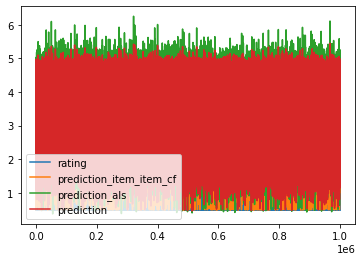

In [14]:
prediction_df.drop(['userId', 'movieId'], axis=1).plot()

<AxesSubplot:>

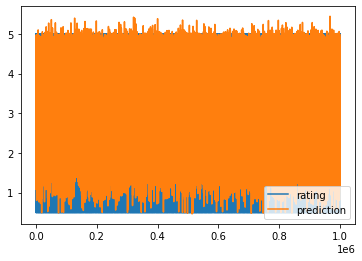

In [15]:
prediction_df.drop(['userId', 'movieId', 'prediction_item_item_cf', 'prediction_als'], axis=1).plot()

<AxesSubplot:>

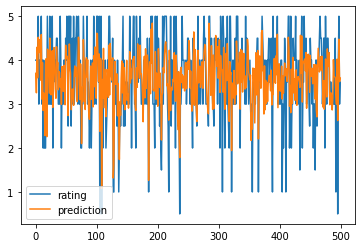

In [16]:
prediction_df[:500].drop(['userId', 'movieId', 'prediction_item_item_cf', 'prediction_als'], axis=1).plot()